#Driver drowsiness detection using CNN with resnet architecture

Importing drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as data_augment

Defining training and validation dataset

In [3]:
!unzip -uq "/content/drive/MyDrive/Driver_Drowsiness.zip" 
!ls

 drive	'Driver Drowsiness Dataset (DDD)'   sample_data


In [4]:
image_size = (180, 180)
batch_size = 64

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Driver Drowsiness Dataset (DDD)",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Driver Drowsiness Dataset (DDD)",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 41788 files belonging to 2 classes.
Using 33431 files for training.
Found 41788 files belonging to 2 classes.
Using 8357 files for validation.


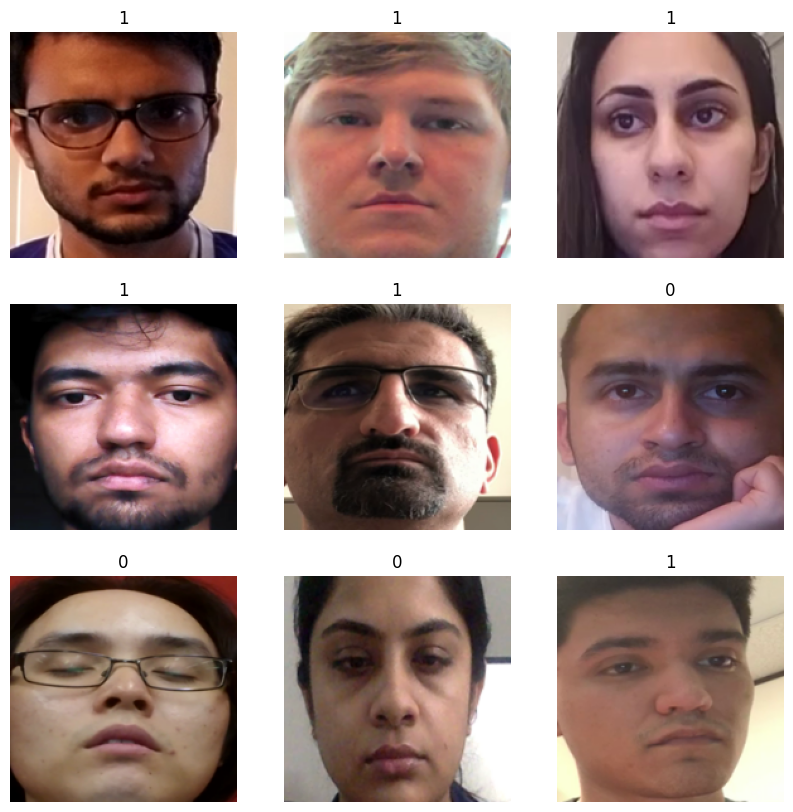

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

Data augmentation

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

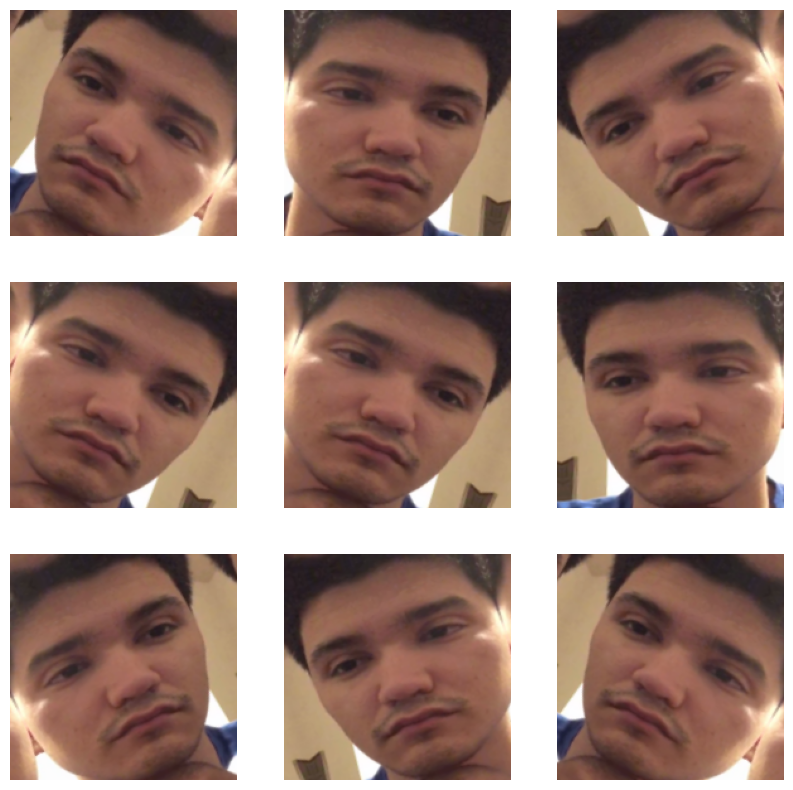

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
train_data = train_data.prefetch(buffer_size=64)
val_data = val_data.prefetch(buffer_size=64)

Creating the model using Resnet architecture

In [9]:
base_model = keras.applications.ResNet152V2(weights="imagenet",input_shape=(180, 180, 3), include_top=False,)

base_model.trainable = True
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)



mean = np.array([127.5] * 3)
var = mean ** 2

norm_layer = keras.layers.experimental.preprocessing.Normalization(mean=mean, variance=var)
x = norm_layer(x)


x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)  


outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

234545216/234545216 [==============================] - 1s 0us/step


Training the model

In [10]:
callbacks = [keras.callbacks.ModelCheckpoint("save_model_DDD.p1"),]
model.compile( optimizer=keras.optimizers.Adam(1e-5),loss="binary_crossentropy",metrics=["accuracy"],)
history=model.fit(train_data, epochs=4, callbacks=callbacks, validation_data=val_data,)

Epoch 1/4
523/523 [==============================] - ETA: 0s - loss: 0.0805 - accuracy: 0.9633

523/523 [==============================] - 852s 1s/step - loss: 0.0805 - accuracy: 0.9633 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 2/4
523/523 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9981

523/523 [==============================] - 733s 1s/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 3/4
523/523 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991

523/523 [==============================] - 741s 1s/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9983
Epoch 4/4
523/523 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994

523/523 [==============================] - 689s 1s/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 3.9097e-04 - val_accuracy: 0.9999


PLotting epoch vs training accuracy

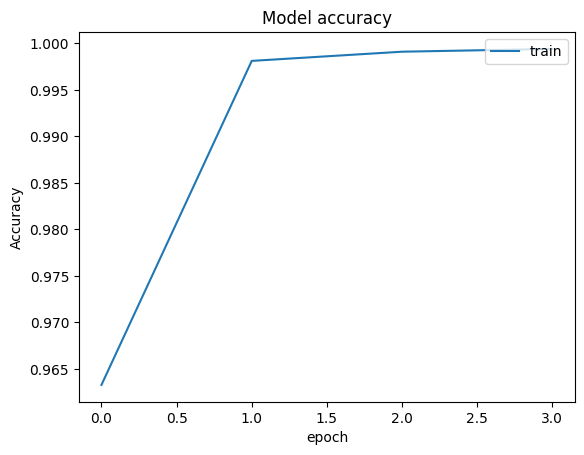

In [11]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

PLotting epoch vs training loss

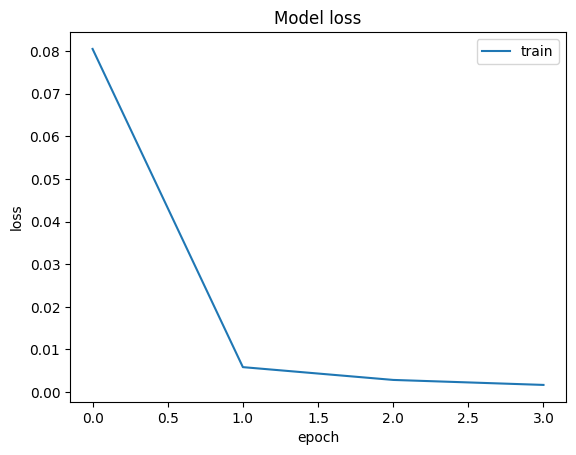

In [12]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

PLotting epoch vs tvalidation accuracy

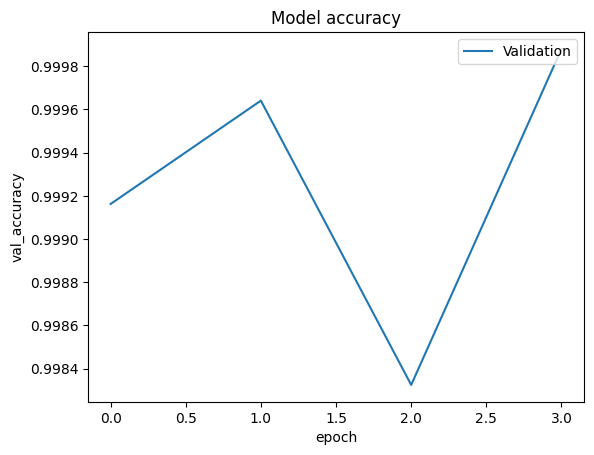

In [13]:
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['Validation'],loc='upper right')
plt.show()

PLotting epoch vs validation loss

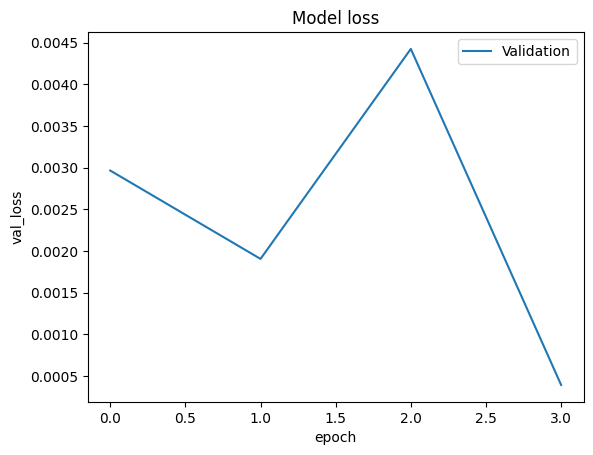

In [14]:
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['Validation'],loc='upper right')
plt.show()